In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date


In [2]:
#population_data = pd.read_csv("")
#Import the csv's, specify the first row as headers and rename the headers
fertility_data = pd.read_csv("./data/total-fertility-rate-by-development-level-including-UN-projections-through-2100.csv",
                            names=["Country", "Country Code", "Year", "Live births per woman", "Projected live births per woman"],
                            header=0)
#Merge the historic and projectic fertility columns into one for easier processing
fertility_data["Live births per woman"].fillna(fertility_data["Projected live births per woman"], inplace=True)
#Delete the now redundant projected fertility column
fertility_data = fertility_data.drop(["Projected live births per woman", "Country Code"], axis=1)

poverty_data = pd.read_csv("./data/share-of-population-in-extreme-poverty.csv",
                          names=["Country", "Country Code", "Year", "Ratio of people in poverty"],
                          header=0)
poverty_data = poverty_data.drop(["Country Code"], axis=1)

In [3]:
#print last 5 rows of data
print(poverty_data.tail())

       Country  Year  Ratio of people in poverty
2388    Zambia  2010                   65.817991
2389    Zambia  2015                   58.745971
2390  Zimbabwe  2011                   21.355553
2391  Zimbabwe  2017                   33.863872
2392  Zimbabwe  2019                   39.532140


In [4]:
countries = ["Sub-Saharan Africa", "China"] #countries we're interested in
current_year = date.today().year #current year
df = pd.merge(fertility_data, poverty_data, on=["Country", "Year"]) #merge 2 dataframes by country and year
historic_df = df[df["Year"] <= current_year] #get only the entries from the past
df[df["Country"].isin(countries)] #get only the countries we want
print(df.tail()) #print last 5 entries

       Country  Year  Live births per woman  Ratio of people in poverty
2071    Zambia  2010                  5.415                   65.817991
2072    Zambia  2015                  4.918                   58.745971
2073  Zimbabwe  2011                  4.059                   21.355553
2074  Zimbabwe  2017                  3.707                   33.863872
2075  Zimbabwe  2019                  3.531                   39.532140


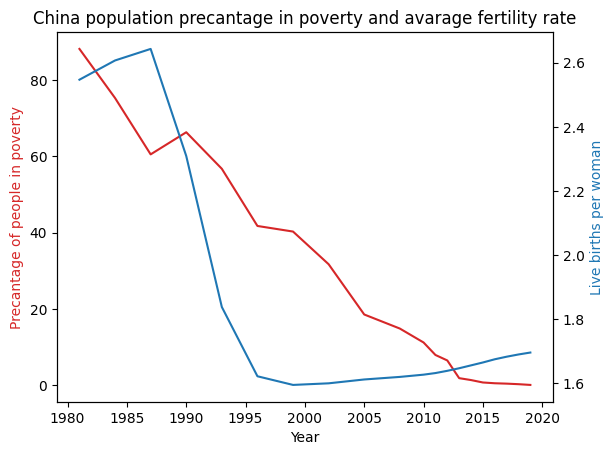

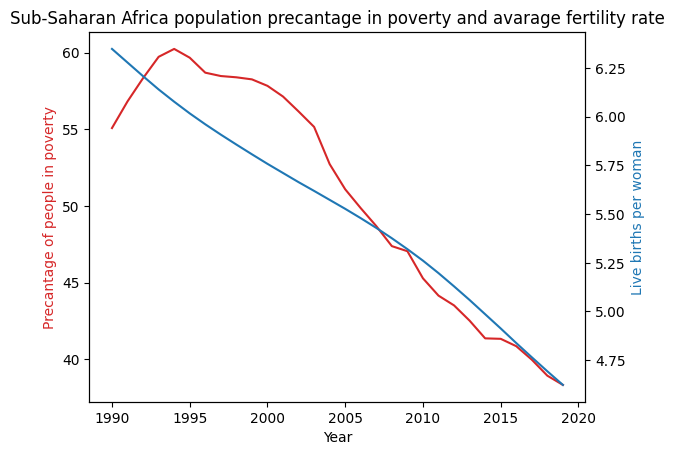

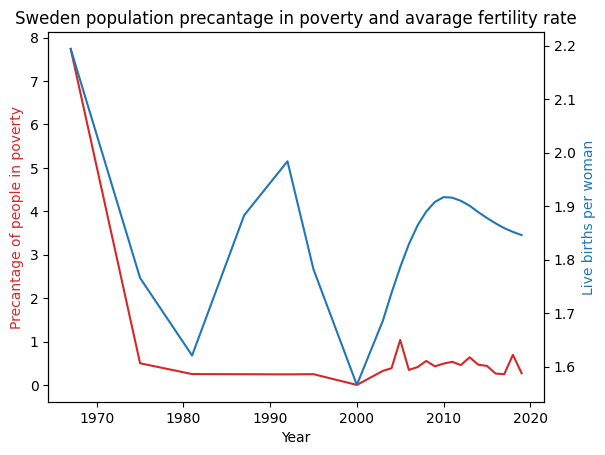

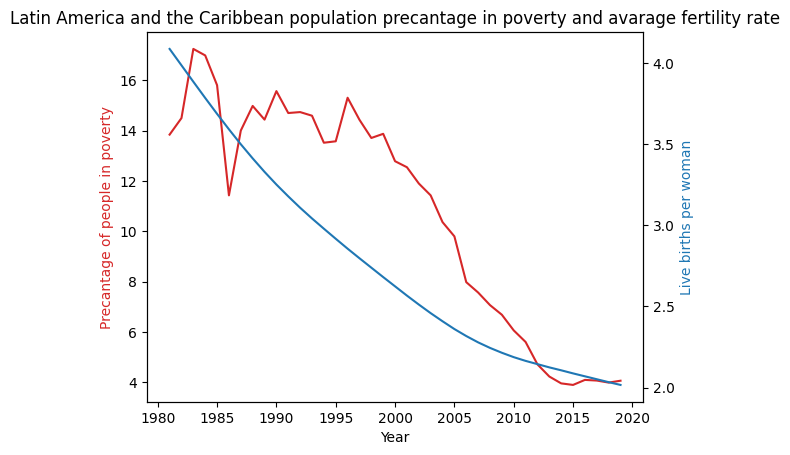

In [14]:
entities = ["China", "Sub-Saharan Africa", "Sweden", "Latin America and the Caribbean"]

for entity in entities:
    data = historic_df[historic_df["Country"] == entity]
    fig, ax1 = plt.subplots()

    poverty_color = 'tab:red'
    fertility_color = 'tab:blue'
    
    #Set title
    plt.title(f"{entity} population precantage in poverty and avarage fertility rate")
    
    #Set labels
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Percantage of people in poverty', color=poverty_color)
    
    ax1.plot(data["Year"], data["Ratio of people in poverty"], color=poverty_color)
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('Live births per woman', color=fertility_color)  # we already handled the x-label with ax1
    ax2.plot(data["Year"], data["Live births per woman"], color=fertility_color)
    ax2.tick_params(axis='y')

    plt.show()



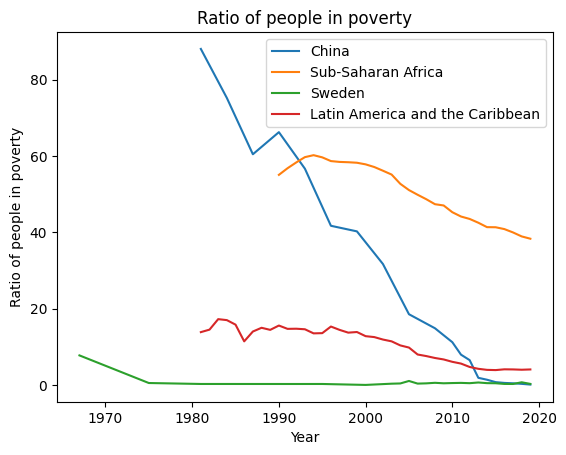

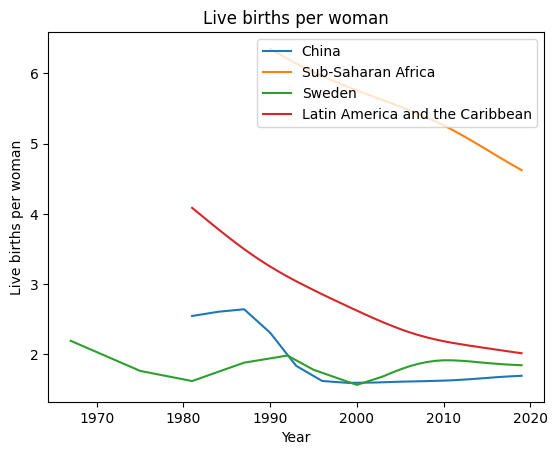

In [28]:
properties_to_graph = ["Ratio of people in poverty", "Live births per woman"]

for prop in properties_to_graph:
    #Set title
    plt.title(prop)

    #Set labels
    plt.xlabel('Year')
    plt.ylabel(prop)
    
    #plot countries
    for entity in entities:
        data = historic_df[historic_df["Country"] == entity]
        plt.plot(data["Year"], data[prop], label=entity)
        plt.tick_params(axis='y')

    plt.legend(loc="upper right")
    plt.show()